<a href="https://colab.research.google.com/github/asgardian1196/asg-ml/blob/main/Deep_Learning_Tabular_Data_Model_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ISE 244] Deep Learning on Tabular Data


### Anoushka Gade


In [ ]:
from sklearn.model_selection import train_test_split,KFold
import pandas as pd
import numpy as np

In [ ]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Reading Data 

In [ ]:
buildings = pd.read_csv('train.csv')

In [ ]:
buildings_test = pd.read_csv('test.csv')

In [ ]:
categorical_columns = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
buildings = pd.get_dummies(buildings, columns=categorical_columns)
print(buildings.shape)

(75757, 135)


In [ ]:
X = buildings.drop(['site_eui'] , axis = 1)
y = buildings['site_eui']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y_tr_log1p = np.log1p(y_train)
X_tr_np = X_train.to_numpy()
y_tr_np = y_tr_log1p.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy()

In [ ]:
test_id = buildings_test['id']
buildings_test.drop(['id'],axis = 1,inplace = True)

In [ ]:
buildings_test.shape

(9705, 62)

In [ ]:
new_test_data = buildings_test.to_numpy()

In [ ]:
!pip install pytorch_tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

kf = KFold(n_splits=5, random_state=42, shuffle=True)
predictions_array =[]
CV_score_array    =[]
for train_index, test_index in kf.split(X_tr_np):
    X_train_kf, X_valid_kf = X_tr_np[train_index], X_tr_np[test_index]
    y_train_kf, y_valid_kf = y_tr_np[train_index], y_tr_np[test_index]
    regressor = TabNetRegressor(seed=42)
    regressor.fit(X_train=X_train_kf, y_train=y_train_kf,
              eval_set=[(X_valid_kf, y_valid_kf)],
              patience=300, max_epochs=50,
              eval_metric=['rmse'])
    CV_score_array.append(regressor.best_cost)
    predictions_array.append(np.expm1(regressor.predict(X_test)))

predictions = np.mean(predictions_array,axis=0)

Device used : cpu


ValueError: ignored

### Understanding Data (Review)

* Understand distributions
* Trends
* Relationships
* Patterns

### Data Distribution

In [ ]:
pd.set_option('display.max_columns', None)
buildings.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [ ]:
buildings.shape

(75757, 64)

In [ ]:
obj = buildings.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Year_Factor , 0
State_Factor , 0
building_class , 0
facility_type , 0
floor_area , 0
year_built , 1837
energy_star_rating , 26709
ELEVATION , 0
january_min_temp , 0
january_avg_temp , 0
january_max_temp , 0
february_min_temp , 0
february_avg_temp , 0
february_max_temp , 0
march_min_temp , 0
march_avg_temp , 0
march_max_temp , 0
april_min_temp , 0
april_avg_temp , 0
april_max_temp , 0
may_min_temp , 0
may_avg_temp , 0
may_max_temp , 0
june_min_temp , 0
june_avg_temp , 0
june_max_temp , 0
july_min_temp , 0
july_avg_temp , 0
july_max_temp , 0
august_min_temp , 0
august_avg_temp , 0
august_max_temp , 0
september_min_temp , 0
september_avg_temp , 0
september_max_temp , 0
october_min_temp , 0
october_avg_temp , 0
october_max_temp , 0
november_min_temp , 0
november_avg_temp , 0
november_max_temp , 0
december_min_temp , 0
december_avg_temp , 0
december_max_temp , 0
cooling_degree_days , 0
heating_degree_days , 0
precipitation_inches , 0
snowfall_inches , 0
snowdepth_inches , 0
avg_temp , 0
day

**The columns year_built has 1837 missing values and energy_star_rating has 26709 missing values. 
The wind-speed related columns such as 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed' and 'days_with_fog' have more than half missing values.  
For all of the above mentioned columns, we will replace it with the mean of the entire column**

In [ ]:
import numpy as np
buildings['year_built'] = buildings['year_built'].replace(np.nan, int(buildings['year_built'].mean()))
buildings['energy_star_rating'] = buildings['energy_star_rating'].replace(np.nan,buildings['energy_star_rating'].mean())
buildings['direction_max_wind_speed'] = buildings['direction_max_wind_speed'].replace(np.nan,buildings['direction_max_wind_speed'].mean())
buildings['direction_peak_wind_speed'] = buildings['direction_peak_wind_speed'].replace(np.nan,buildings['direction_peak_wind_speed'].mean())
buildings['max_wind_speed'] = buildings['max_wind_speed'].replace(np.nan,buildings['max_wind_speed'].mean())
buildings['days_with_fog'] = buildings['days_with_fog'].replace(np.nan,buildings['days_with_fog'].mean())


In [ ]:
buildings = buildings.drop_duplicates()
buildings.shape

(75757, 64)

In [ ]:
buildings.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.299325,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,36.601638,23.063738,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,88.726751,87.226977,4.369629,31.883663,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,56.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978.0

## Correlation between the features

<Figure size 864x720 with 0 Axes>

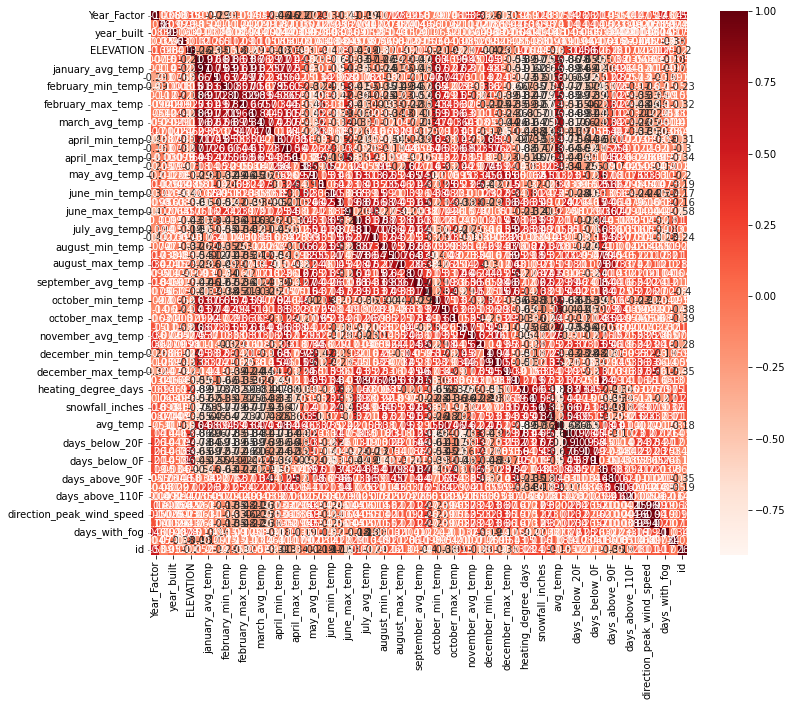

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = buildings.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Its impossible to understand the correlation values, so lets extract features that would be meaningful here. 

Based on the data, I have picked columns like 'year_built, 'energy_star_rating', 'Elevation, and the average temperatures of each month, and site_eui.
I have also considered extremes like 'days_below_0F' and 'days_above_110F' 

From the above figure, the months temperatureare are highly correlated to the other months, so we can elimate them, or take an average based on the season.  
Jan - Feb - March - April : Spring  
May - Jun - July - Aug - Sep :Summer/Fall  
Oct - Nov - Dec : Winter  

For EDA purposes, I am taking the middle month in each season.  i.e Feb, June, Nov

In [ ]:
relevant_columns = ['year_built', 'energy_star_rating', 'ELEVATION', 'february_avg_temp','june_avg_temp', 'november_avg_temp', 'avg_temp', 'days_below_0F', 'days_above_110F', 'site_eui']

<Figure size 864x720 with 0 Axes>

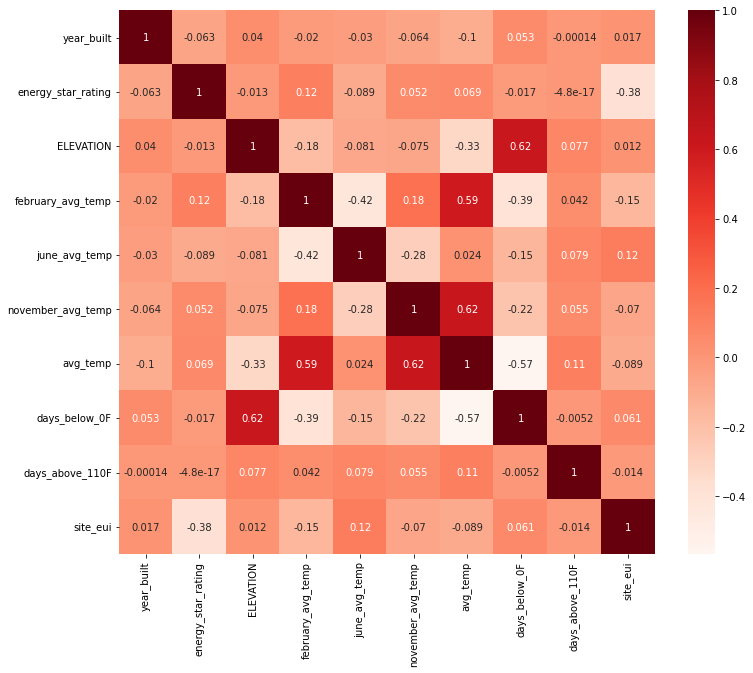

In [ ]:
plt.figure(figsize=(12,10))
cor = buildings[relevant_columns].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From the above heatmap we can infer the following -
1. year-built is negatively correlated to energy_star_rating, which means that older buildings have lower ratings. (1930 vs 2000) 
2. **energy_star_rating is highly negative correlated to site_eui, which basically means that buildings with low ratings have high site_eui**
3. Elevation is highly correlated to days_below_0F, which means that Buildings at high elevation experience colder days, and vice versa

### Checking unique values for categorical variables

In [ ]:
buildings.Year_Factor.unique()
buildings.State_Factor.unique()
buildings.building_class.unique()
buildings.facility_type.unique()

array([1, 2, 3, 4, 5, 6])

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

array(['Commercial', 'Residential'], dtype=object)

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

## There are a lot of categories in the 'facility_type' column. Combining categories according to major keywords could probably give a better idea of them

In [ ]:
import json
facility_list = ['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation',
       'Service_Uncategorized', 'Warehouse_Refrigerated',
       'Food_Service_Uncategorized', 'Health_Care_Uncategorized',
       'Food_Service_Other', 'Public_Assembly_Movie_Theater',
       'Food_Service_Restaurant_or_cafeteria', 'Food_Sales',
       'Public_Assembly_Uncategorized', 'Nursing_Home',
       'Health_Care_Outpatient_Clinic', 'Education_Preschool_or_daycare',
       '5plus_Unit_Building', 'Multifamily_Uncategorized',
       'Lodging_Dormitory_or_fraternity_sorority',
       'Public_Assembly_Library', 'Public_Safety_Uncategorized',
       'Public_Safety_Fire_or_police_station', 'Office_Mixed_use',
       'Public_Assembly_Other', 'Public_Safety_Penitentiary',
       'Health_Care_Outpatient_Uncategorized', 'Lodging_Other',
       'Mixed_Use_Predominantly_Residential', 'Public_Safety_Courthouse',
       'Public_Assembly_Stadium', 'Lodging_Uncategorized',
       '2to4_Unit_Building', 'Warehouse_Uncategorized']
# print(sorted(facility_list))
facility_list.sort()
new_facility = {}

for f in facility_list:
    keyword = f.split("_")[0]
    if keyword not in new_facility:
        new_facility[keyword] = [f]
    else:
        new_facility[keyword].append(f)

print(json.dumps(new_facility, indent = 2))

{
  "2to4": [
    "2to4_Unit_Building"
  ],
  "5plus": [
    "5plus_Unit_Building"
  ],
  "Commercial": [
    "Commercial_Other",
    "Commercial_Unknown"
  ],
  "Data": [
    "Data_Center"
  ],
  "Education": [
    "Education_College_or_university",
    "Education_Other_classroom",
    "Education_Preschool_or_daycare",
    "Education_Uncategorized"
  ],
  "Food": [
    "Food_Sales",
    "Food_Service_Other",
    "Food_Service_Restaurant_or_cafeteria",
    "Food_Service_Uncategorized"
  ],
  "Grocery": [
    "Grocery_store_or_food_market"
  ],
  "Health": [
    "Health_Care_Inpatient",
    "Health_Care_Outpatient_Clinic",
    "Health_Care_Outpatient_Uncategorized",
    "Health_Care_Uncategorized"
  ],
  "Industrial": [
    "Industrial"
  ],
  "Laboratory": [
    "Laboratory"
  ],
  "Lodging": [
    "Lodging_Dormitory_or_fraternity_sorority",
    "Lodging_Hotel",
    "Lodging_Other",
    "Lodging_Uncategorized"
  ],
  "Mixed": [
    "Mixed_Use_Commercial_and_Residential",
    "Mixed_Use

### Convert the facility type column according to above mapping

In [ ]:
buildings.facility_type = buildings.facility_type.str.split("_").str[0]
buildings.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,0
1,1,State_1,Commercial,Warehouse,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1
2,1,State_1,Commercial,Retail,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,2
3,1,State_1,Commercial,Education,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,3
4,1,State_1,Commercial,Warehouse,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,4


### One Hot Encoding of categorical columns

In [ ]:
categorical_columns = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
buildings = pd.get_dummies(buildings, columns=categorical_columns)
print(buildings.shape)
buildings.head()

(75757, 96)


,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,Year_Factor_1,Year_Factor_2,Year_Factor_3,Year_Factor_4,Year_Factor_5,Year_Factor_6,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse
0,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Exploring Energy Star Rating 

Based on the info on wikipedia [https://en.wikipedia.org/wiki/Energy_Star], **Earning a rating of 75 or above is the first step towards achieving the Energy Star for a building**  
The range is from 0-100

The columns like days_below_30F	days_below_20F	days_below_10F	days_below_0F	days_above_80F	days_above_90F	days_above_100F	days_above_110F	 can be group together are cold days and hot days. 
For example, we can consider days below below 0F, 10F, 20F, 30F as cold. And  above 80F, 90F, 100F, 110F as hot. 

In [ ]:
buildings["cold_days"] = buildings['days_below_0F'] + buildings['days_below_10F'] + buildings['days_below_20F'] + buildings['days_below_30F']
buildings["hot_days"] = buildings['days_above_80F'] + buildings['days_above_90F'] + buildings['days_above_100F'] + buildings['days_above_110F']

In [ ]:
buildings.drop(["days_below_0F", "days_below_10F", "days_below_20F", "days_below_30F", "days_above_80F", "days_above_90F"
,"days_above_100F", "days_above_110F"], axis=1)

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,Year_Factor_1,Year_Factor_2,Year_Factor_3,Year_Factor_4,Year_Factor_5,Year_Factor_6,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse,cold_days,hot_days
0,61242.0,1942.0,11.000000,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,1.000000,1.000000,1.000000,109.142051,248.682615,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1,274000.0,1955.0,45.000000,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,1.000000,62.779974,1.000000,12.000000,26.500150,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14
2,280025.0,1951.0,97.000000,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,1.000000,62.779974,1.000000,12.000000,24.693619,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14
3,55325.0,1980.0,46.000000,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,1.000000,62.779974,1.000000,12.000000,48.406926,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
4,66000.0,1985.0,100.000000,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,1.000000,1.000000,1.000000,109.142051,3.899395,4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,20410.0,1995.0,8.000000,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91

## Transforming the 'year_built' based on the decade it belonged to. 

In [ ]:
buildings["year_built"] = buildings["year_built"] - buildings["year_built"]%10

# Final buildings dataset 

In [ ]:
buildings.head()

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,Year_Factor_1,Year_Factor_2,Year_Factor_3,Year_Factor_4,Year_Factor_5,Year_Factor_6,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse,cold_days,hot_days
0,61242.0,1940.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1,274000.0,1950.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14
2,280025.0,1950.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14
3,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
4,66000.0,1980.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14


## Feature Selection

Here I will select features based on the feature engineering done in the above notebooks

In [ ]:
selected_features = [
    "floor_area",
"year_built",
"energy_star_rating",
"ELEVATION",
# "january_min_temp",
"january_avg_temp",
# "january_max_temp",
# "february_min_temp",
"february_avg_temp",
# "february_max_temp",
# "march_min_temp",
"march_avg_temp",
# "march_max_temp",
# "april_min_temp",
"april_avg_temp",
# "april_max_temp",
# "may_min_temp",
"may_avg_temp",
# "may_max_temp",
# "june_min_temp",
"june_avg_temp",
# "june_max_temp",
# "july_min_temp",
"july_avg_temp",
# "july_max_temp",
# "august_min_temp",
"august_avg_temp",
# "august_max_temp",
# "september_min_temp",
"september_avg_temp",
# "september_max_temp",
# "october_min_temp",
"october_avg_temp",
# "october_max_temp",
# "november_min_temp",
"november_avg_temp",
# "november_max_temp",
# "december_min_temp",
"december_avg_temp",
# "december_max_temp",
"cooling_degree_days",
"heating_degree_days",
"precipitation_inches",
"snowfall_inches",
"snowdepth_inches",
"avg_temp",
# "days_below_30F",
# "days_below_20F",
# "days_below_10F",
# "days_below_0F",
# "days_above_80F",
# "days_above_90F",
# "days_above_100F",
# "days_above_110F",
# "direction_max_wind_speed",
# "direction_peak_wind_speed",
# "max_wind_speed",
# "days_with_fog",
# "site_eui",
# "id",
"Year_Factor_1",
"Year_Factor_2",
"Year_Factor_3",
"Year_Factor_4",
"Year_Factor_5",
"Year_Factor_6",
"State_Factor_State_1",
"State_Factor_State_10",
"State_Factor_State_11",
"State_Factor_State_2",
"State_Factor_State_4",
"State_Factor_State_6",
"State_Factor_State_8",
"building_class_Commercial",
"building_class_Residential",
"facility_type_2to4",
"facility_type_5plus",
"facility_type_Commercial",
"facility_type_Data",
"facility_type_Education",
"facility_type_Food",
"facility_type_Grocery",
"facility_type_Health",
"facility_type_Industrial",
"facility_type_Laboratory",
"facility_type_Lodging",
"facility_type_Mixed",
"facility_type_Multifamily",
"facility_type_Nursing",
"facility_type_Office",
"facility_type_Parking",
"facility_type_Public",
"facility_type_Religious",
"facility_type_Retail",
"facility_type_Service",
"facility_type_Warehouse",
"cold_days",
"hot_days"
]

In [ ]:
buildings.head()

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,Year_Factor_1,Year_Factor_2,Year_Factor_3,Year_Factor_4,Year_Factor_5,Year_Factor_6,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse,cold_days,hot_days
0,61242.0,1940.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1,274000.0,1950.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14
2,280025.0,1950.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14
3,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
4,66000.0,1980.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14


Creating X and y for testing and training

In [ ]:
X = buildings[selected_features]
y = buildings["site_eui"]

In [ ]:
X.head()
print(X.shape)

,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,june_avg_temp,july_avg_temp,august_avg_temp,september_avg_temp,october_avg_temp,november_avg_temp,december_avg_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,Year_Factor_1,Year_Factor_2,Year_Factor_3,Year_Factor_4,Year_Factor_5,Year_Factor_6,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse,cold_days,hot_days
0,61242.0,1940.0,11.0,2.4,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1,274000.0,1950.0,45.0,1.8,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14
2,280025.0,1950.0,97.0,1.8,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14
3,55325.0,1980.0,46.0,1.8,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
4,66000.0,1980.0,100.0,2.4,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14


(75757, 60)


In [ ]:
y.head()

0    248.682615
1     26.500150
2     24.693619
3     48.406926
4      3.899395
Name: site_eui, dtype: float64

Test Train split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56817, 60)
(56817,)
(18940, 60)
(18940,)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Predicting for test set

In [ ]:
y_pred = lin_reg.predict(X_test) 

Evaluating model

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 24.340090383757346
Mean Squared Error: 2154.8687272214406
Root Mean Squared Error: 46.42056362455588
R2 Score:  0.34012397966729857


Actual vs Predicted for Linear Regression

In [ ]:
c = pd.DataFrame({ "Actual": y_test, "Predictions": y_pred})
c

,Actual,Predictions
29922,164.206724,104.140105
55120,46.372951,47.938539
52830,84.069672,76.725839
47809,69.311230,79.694088
4663,41.087432,44.851912
...,...,...
66308,71.663102,66.824006
24590,63.505141,81.049276
38947,107.048090,82.340971
63782,152.482240,132.039970


Light GBM regression

In [ ]:
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor()
lgbm_reg.fit(X_train, y_train)

LGBMRegressor()

Predicting for test set

In [ ]:
y_pred_lgbm = lgbm_reg.predict(X_test)

Evaluating the model

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lgbm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lgbm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred_lgbm))

Mean Absolute Error: 21.545329854431355
Mean Squared Error: 1756.7772891145323
Root Mean Squared Error: 41.91392714974979
R2 Score:  0.46202977865544903


Actual vs Predicted for LGBM regressor

In [ ]:
c = pd.DataFrame({ "Actual": y_test, "Predictions": y_pred_lgbm})
c

,Actual,Predictions
29922,164.206724,107.818646
55120,46.372951,47.950455
52830,84.069672,79.688330
47809,69.311230,77.991096
4663,41.087432,38.896696
...,...,...
66308,71.663102,64.323068
24590,63.505141,83.364389
38947,107.048090,90.794342
63782,152.482240,129.717762


XGBoost Regressor

In [ ]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

[07:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Predicting for test set

In [ ]:
y_pred_xgb = xgb_reg.predict(X_test)

Evaluating the model

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred_xgb))

Mean Absolute Error: 22.67036296552287
Mean Squared Error: 1870.7351132112494
Root Mean Squared Error: 43.251995482419645
R2 Score:  0.4271329728775497


Ensemble Apprach -  XGB + LGB + CatBoost

In [ ]:
import catboost as cb
from sklearn.ensemble import VotingRegressor

regressor = VotingRegressor([
    (
        "xgb", 
        xgb.XGBRegressor(
            n_estimators=1000,
            max_depth=8,
            learning_rate=0.15,
            verbosity=0,
            random_state=777,
        )
    ),
    (
        "lgb",
        lgbm.LGBMRegressor(
            force_row_wise=True,
            max_depth=8,
            learning_rate=0.15,
            n_estimators=1000,
            num_leaves=256,
            # device="cpu",
            random_state=777
        )
    ),
    (
        "cb",
        cb.CatBoostRegressor(
            n_estimators=1000,
            learning_rate=0.15,
            max_depth=8,
            verbose=False,
            random_seed=777,
            # task_type="CPU"
        )
    )
])

Model creation and prediction

In [ ]:
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(learning_rate=0.15, max_depth=8,
                                          n_estimators=1000, random_state=777,
                                          verbosity=0)),
                            ('lgb',
                             LGBMRegressor(force_row_wise=True,
                                           learning_rate=0.15, max_depth=8,
                                           n_estimators=1000, num_leaves=256,
                                           random_state=777)),
                            ('cb',
                             <catboost.core.CatBoostRegressor object at 0x7fbb5326aed0>)])

Ensemble model evaluation

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 Score: ", metrics.r2_score(y_test, predictions))

Mean Absolute Error: 19.611456335873108
Mean Squared Error: 1463.7414829948777
Root Mean Squared Error: 38.25887456518915
R2 Score:  0.5517648511981542


Here we are getting a good R2 score after using the ensemble approach. We can use this model to predict values for our test set

Test Data

In [ ]:
test = pd.read_csv("test (1).csv")
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [ ]:
import numpy as np
test['year_built'] = test['year_built'].replace(np.nan, int(test['year_built'].mean()))
test['energy_star_rating'] = test['energy_star_rating'].replace(np.nan,test['energy_star_rating'].mean())
test['direction_max_wind_speed'] = test['direction_max_wind_speed'].replace(np.nan,test['direction_max_wind_speed'].mean())
test['direction_peak_wind_speed'] = test['direction_peak_wind_speed'].replace(np.nan,test['direction_peak_wind_speed'].mean())
test['max_wind_speed'] = test['max_wind_speed'].replace(np.nan,test['max_wind_speed'].mean())
test['days_with_fog'] = test['days_with_fog'].replace(np.nan,test['days_with_fog'].mean())


In [ ]:
test = test.drop_duplicates()
test.shape

(9705, 63)

In [ ]:
test.facility_type = test.facility_type.str.split("_").str[0]

In [ ]:
categorical_columns = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
test = pd.get_dummies(test, columns=categorical_columns)
print(test.shape)
test.head()

(9705, 89)


,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id,Year_Factor_7,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse
0,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75757,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75758,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75759,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75760,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.000000,330.00000,22.800000,126.000000,75761,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test["cold_days"] = test['days_below_0F'] + test['days_below_10F'] + test['days_below_20F'] + test['days_below_30F']
test["hot_days"] = test['days_above_80F'] + test['days_above_90F'] + test['days_above_100F'] + test['days_above_110F']
test.drop(["days_below_0F", "days_below_10F", "days_below_20F", "days_below_30F", "days_above_80F", "days_above_90F"
,"days_above_100F", "days_above_110F"], axis=1)

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id,Year_Factor_7,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse,cold_days,hot_days
0,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,321.743363,310.19469,18.131327,150.755102,75757,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
1,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,321.743363,310.19469,18.131327,150.755102,75758,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
2,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,321.743363,310.19469,18.131327,150.755102,75759,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
3,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,321.743363,310.19469,18.131327,150.755102,75760,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
4,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,340.000000,330.00000,22.800000,126.000000,75761,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,305925.0,2013.0,99.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,321.743363,310.19469,18.131327,150.755102,85457,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
test["year_built"] = test["year_built"] - test["year_built"]%10

In [ ]:
test.head()

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id,Year_Factor_7,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse,cold_days,hot_days
0,28484.0,1990.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75757,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
1,21906.0,1960.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75758,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
2,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75759,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
3,97422.0,1970.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102,75760,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
4,61242.0,1940.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.000000,330.00000,22.800000,126.000000,75761,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36


In [ ]:

a = test.columns
b = X.columns

for i in b:
  if i not in a:
    print(i)
    test[i] = 0

Year_Factor_1
Year_Factor_2
Year_Factor_3
Year_Factor_4
Year_Factor_5
Year_Factor_6
State_Factor_State_6


In [ ]:
test_X = test[selected_features]
test_X.head()
print(test_X.shape)
print(X.shape)
X.head()

,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,june_avg_temp,july_avg_temp,august_avg_temp,september_avg_temp,october_avg_temp,november_avg_temp,december_avg_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,Year_Factor_1,Year_Factor_2,Year_Factor_3,Year_Factor_4,Year_Factor_5,Year_Factor_6,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse,cold_days,hot_days
0,28484.0,1990.0,37.0,2.4,50.596774,54.482143,56.935484,58.45,60.903226,63.15,64.258065,65.854839,69.766667,64.193548,58.05,51.887097,342,2112,25.24,0.0,0,59.894521,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
1,21906.0,1960.0,55.0,45.7,50.596774,54.482143,56.935484,58.45,60.903226,63.15,64.258065,65.854839,69.766667,64.193548,58.05,51.887097,342,2112,25.24,0.0,0,59.894521,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
2,16138.0,1950.0,1.0,59.1,50.596774,54.482143,56.935484,58.45,60.903226,63.15,64.258065,65.854839,69.766667,64.193548,58.05,51.887097,342,2112,25.24,0.0,0,59.894521,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
3,97422.0,1970.0,34.0,35.4,50.596774,54.482143,56.935484,58.45,60.903226,63.15,64.258065,65.854839,69.766667,64.193548,58.05,51.887097,342,2112,25.24,0.0,0,59.894521,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
4,61242.0,1940.0,35.0,1.8,50.596774,54.482143,56.935484,58.45,60.903226,63.15,64.258065,65.854839,69.766667,64.193548,58.05,51.887097,342,2112,25.24,0.0,0,59.894521,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36


(9705, 60)
(75757, 60)


,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,june_avg_temp,july_avg_temp,august_avg_temp,september_avg_temp,october_avg_temp,november_avg_temp,december_avg_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,Year_Factor_1,Year_Factor_2,Year_Factor_3,Year_Factor_4,Year_Factor_5,Year_Factor_6,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential,facility_type_2to4,facility_type_5plus,facility_type_Commercial,facility_type_Data,facility_type_Education,facility_type_Food,facility_type_Grocery,facility_type_Health,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging,facility_type_Mixed,facility_type_Multifamily,facility_type_Nursing,facility_type_Office,facility_type_Parking,facility_type_Public,facility_type_Religious,facility_type_Retail,facility_type_Service,facility_type_Warehouse,cold_days,hot_days
0,61242.0,1940.0,11.0,2.4,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1,274000.0,1950.0,45.0,1.8,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14
2,280025.0,1950.0,97.0,1.8,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14
3,55325.0,1980.0,46.0,1.8,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
4,66000.0,1980.0,100.0,2.4,50.5,50.589286,53.693548,55.5,56.854839,60.5,62.725806,62.16129,64.65,63.016129,53.8,49.274194,115,2960,16.59,0.0,0,56.972603,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14


In [ ]:
test_predictions = regressor.predict(test_X)

In [ ]:
submissions = pd.DataFrame({ "site_eui": test_predictions})
submissions["id"] = test["id"]

In [ ]:
submissions = submissions[["id", "site_eui"]]
submissions.head()

,id,site_eui
0,75757,258.101126
1,75758,218.676363
2,75759,164.180572
3,75760,250.881072
4,75761,238.135412


In [ ]:
submissions.to_csv("submissions.csv",index=False)

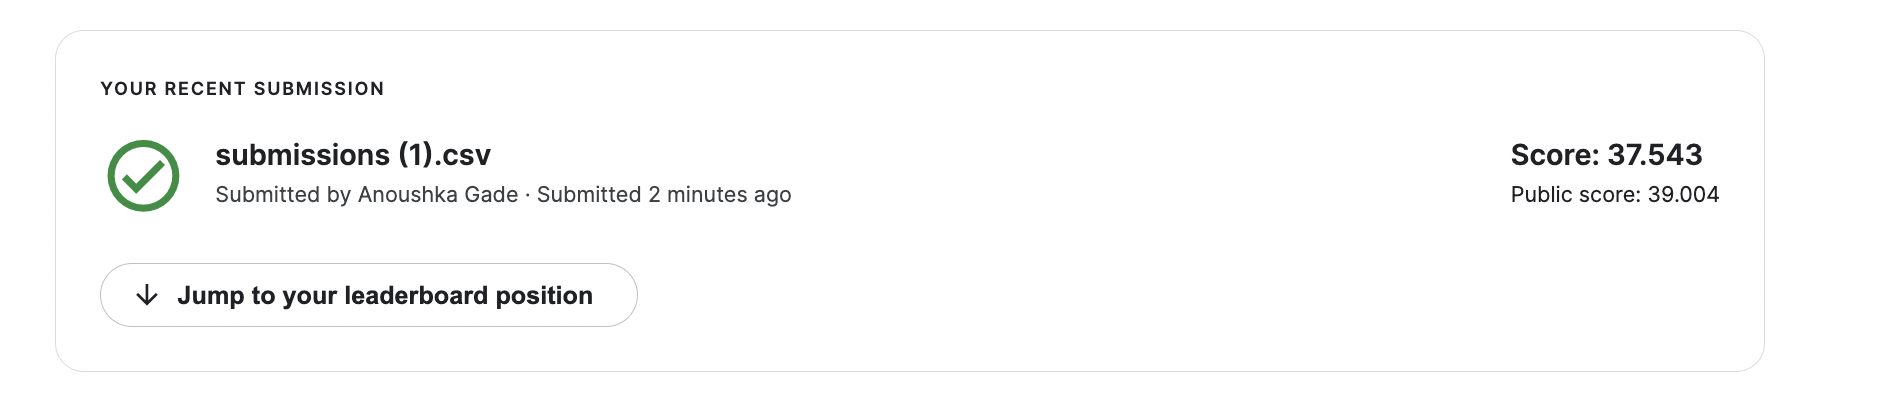

# Deep Learning on Tabular Data